<a href="https://colab.research.google.com/github/zjimf/Cerebral-Stroke-Prediction/blob/master/Cerebral_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#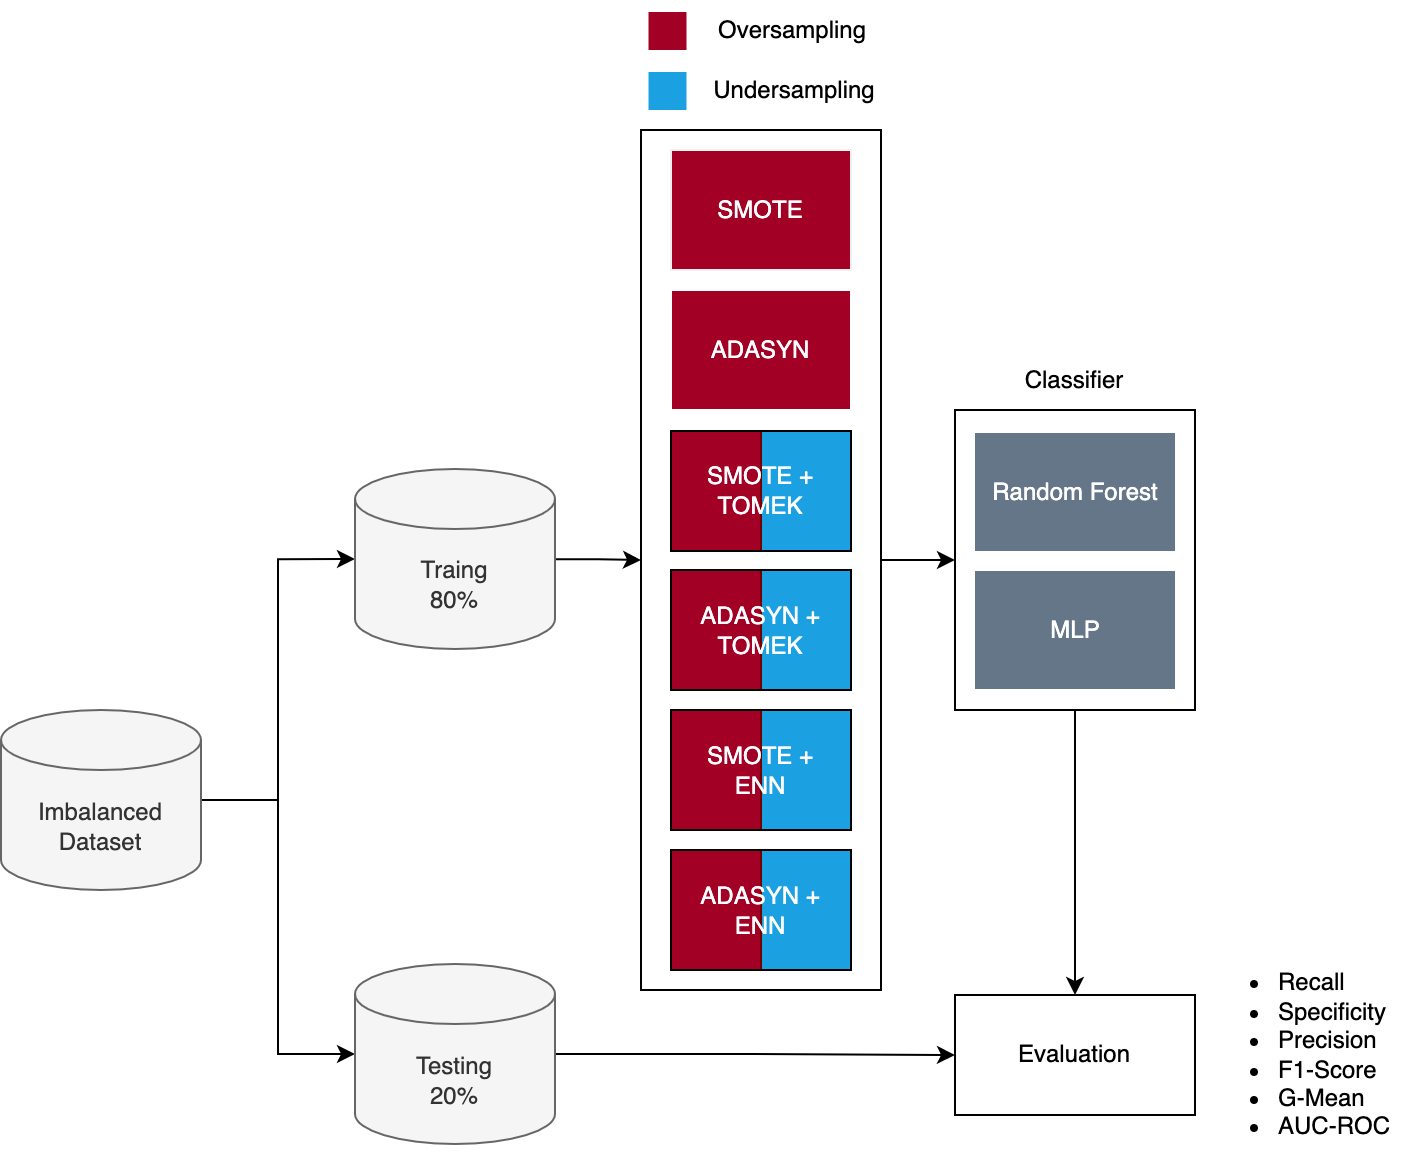**Loading Dataset**

In [160]:
!gdown --id '1ysAKkeJoSCYQ-b152N1VY3XOnOFBJXB0' --output Cerebral_Stroke_Prediction.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ysAKkeJoSCYQ-b152N1VY3XOnOFBJXB0
To: /content/Cerebral_Stroke_Prediction.csv
100% 2.64M/2.64M [00:00<00:00, 167MB/s]


#**Import**

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [162]:
file_path = './Cerebral_Stroke_Prediction.csv'
df = pd.read_csv(file_path)

In [163]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# **Analysis**

## Data detail

In [164]:
# Checking for missing values
missing_data = df.isnull().sum()

# Calculating descriptive statistics
descriptive_stats = df.describe()

missing_data, descriptive_stats, df.smoking_status.value_counts()

(id                       0
 gender                   0
 age                      0
 hypertension             0
 heart_disease            0
 ever_married             0
 work_type                0
 Residence_type           0
 avg_glucose_level        0
 bmi                   1462
 smoking_status       13292
 stroke                   0
 dtype: int64,
                  id           age  hypertension  heart_disease  \
 count  43400.000000  43400.000000  43400.000000   43400.000000   
 mean   36326.142350     42.217894      0.093571       0.047512   
 std    21072.134879     22.519649      0.291235       0.212733   
 min        1.000000      0.080000      0.000000       0.000000   
 25%    18038.500000     24.000000      0.000000       0.000000   
 50%    36351.500000     44.000000      0.000000       0.000000   
 75%    54514.250000     60.000000      0.000000       0.000000   
 max    72943.000000     82.000000      1.000000       1.000000   
 
        avg_glucose_level           bmi     

## Corr

*   1 表示完全正相關：當一個變量增加時，另一個變量也以固定比例
增加。
*   0 表示無相關：兩個變量之間沒有線性關係。
*   -1 表示完全負相關：當一個變量增加時，另一個變量以固定比例減少。



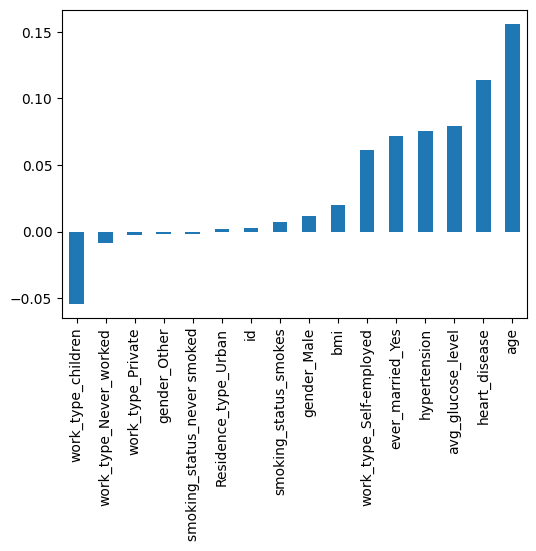

In [165]:
df_numerical = pd.get_dummies(df, drop_first=True)

correlation_all = df_numerical.corr()

stroke_correlation_all = correlation_all['stroke'].sort_values()

plt.figure(figsize=(6, 4))
stroke_correlation_all.drop('stroke').plot(kind='bar')
plt.show()

## Imbalanced dataset

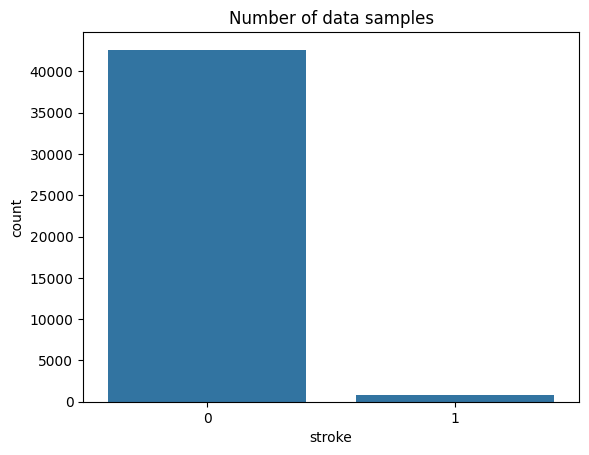

In [166]:
sns.countplot(x = 'stroke', data = df)
plt.title("Number of data samples")
plt.show()

# 42617:783

# **Data Clean**

In [167]:
le = LabelEncoder()

# converting the gender into 0 and 1.
df['gender'] = le.fit_transform(df['gender'])

# converting the Residence_type into 0 and 1.
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# converting the ever_married into 0 and 1.
df['ever_married'] = le.fit_transform(df['ever_married'])

stroke_column = df['stroke']
df = df.drop('stroke', axis=1)

# one hot encoded smoking_status
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
df = pd.concat([df, smoking_status_dummies], axis=1)
df = df.drop(['smoking_status'], axis = 1)

df['stroke'] = stroke_column

# drop unuseful value
df = df.drop(['work_type'],axis = 1)
df = df.drop(['id'],axis = 1)

# fill null value
df['bmi'].fillna(df['bmi'].median(),inplace = True)
missing_data = df.isnull().sum()

In [168]:
df.isnull().sum(), df.describe()

(gender                            0
 age                               0
 hypertension                      0
 heart_disease                     0
 ever_married                      0
 Residence_type                    0
 avg_glucose_level                 0
 bmi                               0
 smoking_status_formerly smoked    0
 smoking_status_never smoked       0
 smoking_status_smokes             0
 stroke                            0
 dtype: int64,
              gender           age  hypertension  heart_disease  ever_married  \
 count  43400.000000  43400.000000  43400.000000   43400.000000  43400.000000   
 mean       0.408894     42.217894      0.093571       0.047512      0.643733   
 std        0.492151     22.519649      0.291235       0.212733      0.478901   
 min        0.000000      0.080000      0.000000       0.000000      0.000000   
 25%        0.000000     24.000000      0.000000       0.000000      0.000000   
 50%        0.000000     44.000000      0.000000       

# **Splitting**

In [169]:
from sklearn.model_selection import train_test_split

x = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [170]:
Y_train.value_counts()

0    34098
1      622
Name: stroke, dtype: int64

# **PCA**

In [171]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def drawPCA(X_train, Y_train, title):
  pca = PCA(n_components=2)
  X_train_pca = pca.fit_transform(X_train)

  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='plasma', edgecolor='k', s=20)
  plt.title(title)
  plt.colorbar()
  plt.show()

# **Oversampling**

*   SMOTE
*   ADASYN
*   SMOTE + TOMEK
*   ADASYN + TOMEK
*   SMOTE + ENN
*   ADASYN + ENN




After random over-sampling : 
0    34098
1      622
Name: stroke, dtype: int64


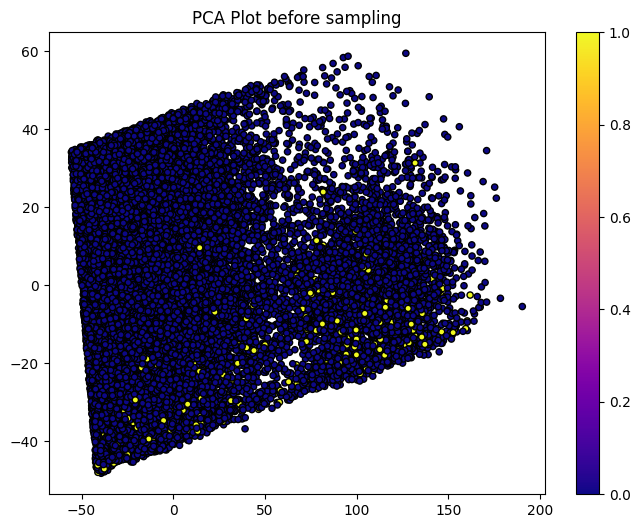

In [172]:
print("After random over-sampling : ")
print(Y_train.value_counts())
drawPCA(X_train, Y_train,"PCA Plot before sampling")

In [173]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

In [174]:
def evaluate_model(classifier, X_train, Y_train, X_test, Y_test, method_name="Method", classifier_name="Classifier"):
    print(f"正在處理 {method_name} + {classifier_name} 組合...")
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    roc_auc = roc_auc_score(Y_test, classifier.predict_proba(X_test)[:, 1])

    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)

    metrics = {
        'Method': method_name,
        'Classifier': classifier_name,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1,
        'G-mean': g_mean,
        'AUC-ROC': roc_auc
    }

    return metrics

In [175]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=300)
}

In [176]:
resampling_methods = {
    'Original': None,
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'SMOTE + TOMEK': SMOTETomek(),
    'SMOTE + ENN': SMOTEENN()
}

過採樣方法: Original


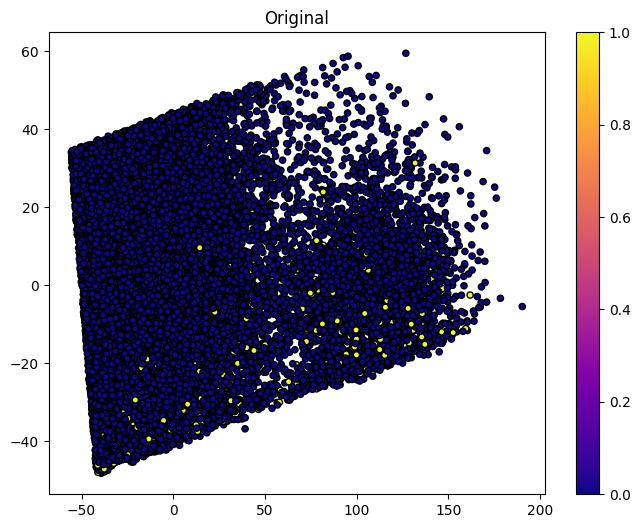

正在處理 Original + Random Forest 組合...
     Method     Classifier  Recall  Specificity  Precision  F1-Score  G-mean  \
0  Original  Random Forest     0.0     0.999883        0.0       0.0     0.0   

    AUC-ROC  
0  0.745759  
正在處理 Original + MLP 組合...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     Method     Classifier  Recall  Specificity  Precision  F1-Score  G-mean  \
0  Original  Random Forest     0.0     0.999883        0.0       0.0     0.0   
1  Original            MLP     0.0     1.000000        0.0       0.0     0.0   

    AUC-ROC  
0  0.745759  
1  0.809399  
過採樣方法: SMOTE


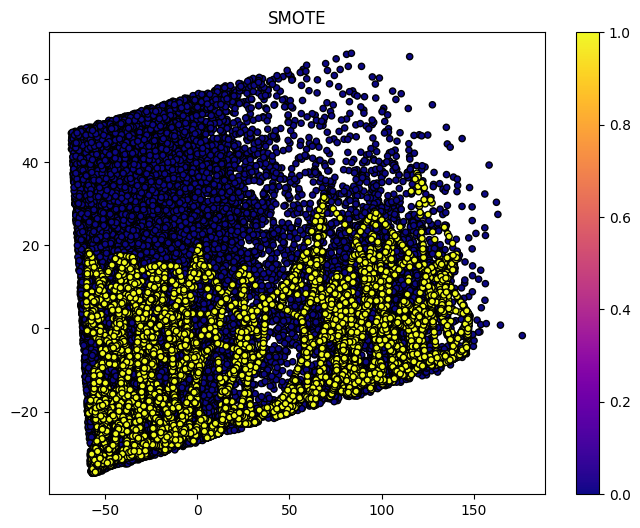

正在處理 SMOTE + Random Forest 組合...
  Method     Classifier    Recall  Specificity  Precision  F1-Score    G-mean  \
0  SMOTE  Random Forest  0.124224     0.968071   0.068493    0.0883  0.346781   

    AUC-ROC  
0  0.716574  
正在處理 SMOTE + MLP 組合...
  Method     Classifier    Recall  Specificity  Precision  F1-Score    G-mean  \
0  SMOTE  Random Forest  0.124224     0.968071   0.068493  0.088300  0.346781   
1  SMOTE            MLP  0.378882     0.852447   0.046282  0.082488  0.568311   

    AUC-ROC  
0  0.716574  
1  0.743048  
過採樣方法: ADASYN


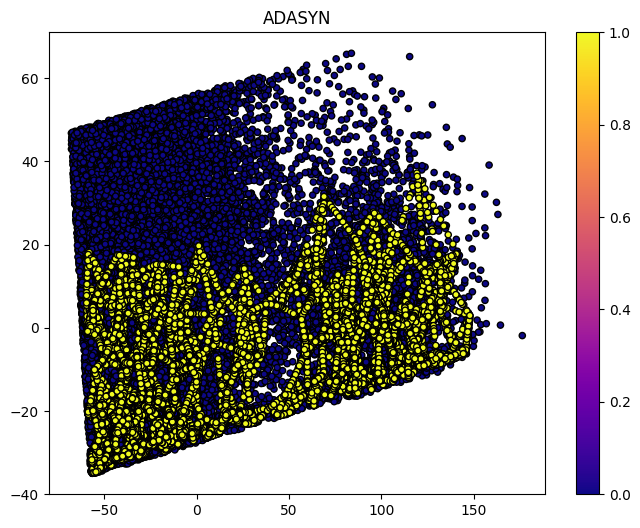

正在處理 ADASYN + Random Forest 組合...
   Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  ADASYN  Random Forest  0.111801     0.968541   0.062937  0.080537   

     G-mean   AUC-ROC  
0  0.329065  0.739695  
正在處理 ADASYN + MLP 組合...
   Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  ADASYN  Random Forest  0.111801     0.968541   0.062937  0.080537   
1  ADASYN            MLP  0.422360     0.810776   0.040476  0.073873   

     G-mean   AUC-ROC  
0  0.329065  0.739695  
1  0.585183  0.738452  
過採樣方法: SMOTE + TOMEK


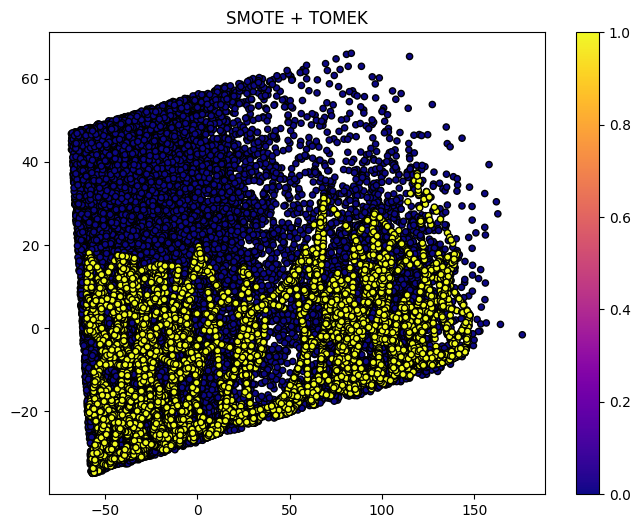

正在處理 SMOTE + TOMEK + Random Forest 組合...
          Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  SMOTE + TOMEK  Random Forest  0.099379     0.968541   0.056338   0.07191   

     G-mean   AUC-ROC  
0  0.310246  0.742899  
正在處理 SMOTE + TOMEK + MLP 組合...
          Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  SMOTE + TOMEK  Random Forest  0.099379     0.968541   0.056338  0.071910   
1  SMOTE + TOMEK            MLP  0.260870     0.888602   0.042381  0.072917   

     G-mean   AUC-ROC  
0  0.310246  0.742899  
1  0.481466  0.727986  
過採樣方法: SMOTE + ENN


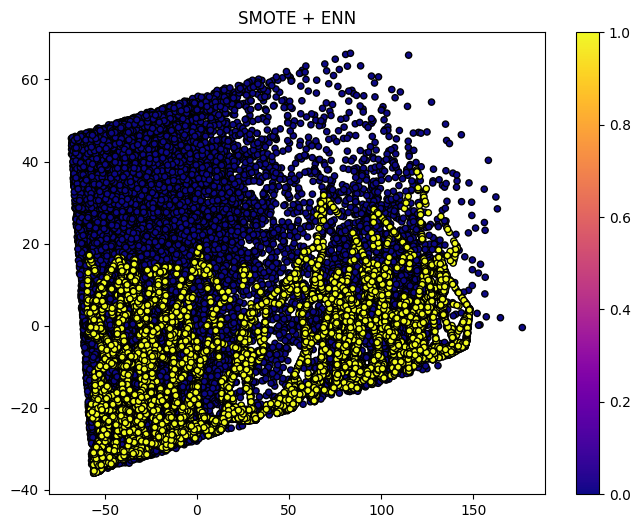

正在處理 SMOTE + ENN + Random Forest 組合...
        Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  SMOTE + ENN  Random Forest  0.161491     0.942951   0.050781  0.077266   

     G-mean   AUC-ROC  
0  0.390228  0.759494  
正在處理 SMOTE + ENN + MLP 組合...
        Method     Classifier    Recall  Specificity  Precision  F1-Score  \
0  SMOTE + ENN  Random Forest  0.161491     0.942951   0.050781  0.077266   
1  SMOTE + ENN            MLP  0.422360     0.824158   0.043423  0.078749   

     G-mean   AUC-ROC  
0  0.390228  0.759494  
1  0.589993  0.755512  


In [177]:
results = []
for method_name, method in resampling_methods.items():
    result = []
    if method is not None:
        X_resampled, Y_resampled = method.fit_resample(X_train, Y_train)
    else:
        X_resampled, Y_resampled = X_train, Y_train
    print(f"過採樣方法: {method_name}")
    drawPCA(X_resampled, Y_resampled, method_name)

    for classifier_name, classifier in classifiers.items():
        metrics = evaluate_model(classifier, X_resampled, Y_resampled, X_test, Y_test, method_name, classifier_name)
        result.append(metrics)
        results.append(metrics)
        result_df = pd.DataFrame(result)
        print(result_df)

In [180]:
results_df = pd.DataFrame(results)

results_df

,Method,Classifier,Recall,Specificity,Precision,F1-Score,G-mean,AUC-ROC
0,Original,Random Forest,0.000000,0.999883,0.000000,0.000000,0.000000,0.745759
1,Original,MLP,0.000000,1.000000,0.000000,0.000000,0.000000,0.809399
2,SMOTE,Random Forest,0.124224,0.968071,0.068493,0.088300,0.346781,0.716574
3,SMOTE,MLP,0.378882,0.852447,0.046282,0.082488,0.568311,0.743048
4,ADASYN,Random Forest,0.111801,0.968541,0.062937,0.080537,0.329065,0.739695
5,ADASYN,MLP,0.422360,0.810776,0.040476,0.073873,0.585183,0.738452
6,SMOTE + TOMEK,Random Forest,0.099379,0.968541,0.056338,0.071910,0.310246,0.742899
7,SMOTE + TOMEK,MLP,0.260870,0.888602,0.042381,0.072917,0.481466,0.727986
8,SMOTE + ENN,Random Forest,0.161491,0.942951,0.050781,0.077266,0.390228,0.759494
9,SMOTE + ENN,MLP,0.422360,0.824158,0.043423,0.078749,0.589993,0.755512
